<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S4_C5_DecisionTree_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol de Decisión - Evaluación del riesgo de ataque cardíaco

In [ ]:
## Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split #  **sklearn** libreria usada para machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')
#mostar lista de archivos
os.listdir()

Mounted at /content/drive


['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv',
 'heart_attack_risk_dataset.csv']

In [ ]:
# Cargue los datos
df = pd.read_csv('heart_attack_risk_dataset.csv')
df.head()

,Age,Weight,Smoker,Risk
0,27,53,0,0
1,46,93,0,0
2,29,56,1,0
3,42,81,0,0
4,21,93,1,0


**Q1** ¿A qué decision podríamos llegar con estos datos?

* Para el sector salud, una herramienta de apoyo al
diagnostico de riesgo de infartos
´*  Para predecir el nivel  de riesgo alto o bajo

**Q2** ¿Que tipo de problema debemos abordar?
es un problema de clasificacion
Target = Risk

In [ ]:
Y = df['Risk']
X = df.drop('Risk', axis=1)

# Actividad 1. Separar las características (X) de la variable objetivo (y)

* Cuál es la variable objetivo?

* Cuáles son los atributos?


# Actividad 2. Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Del datafrend = dataset = df

* **test** = valor que se selecciona de df para hacer una muestra
* **train** = valor que queda del df despues de sacar la muestra para el test

In [ ]:
print(X_train,)

    Age  Weight  Smoker
93   46      70       0
4    21      93       1
51   26      58       0
72   17      79       0
1    46      93       0
..  ...     ...     ...
12   24      67       0
97   27      63       0
45   36      57       0
99   52      95       1
37   46      97       1

[80 rows x 3 columns]


In [ ]:
print(y_train)

93    0
4     0
51    0
72    1
1     0
     ..
12    0
97    0
45    0
99    1
37    1
Name: Risk, Length: 80, dtype: int64


# Actividad 3. Seleccione y ajuste el modelo: árbol de decision

* Ejecute lás líneas de código, si desea cambie el nombre del modelo



In [ ]:
# Crear el modelo de árbol de decisión
modeloDTC = DecisionTreeClassifier()

# Entrenar el modelo
modeloDTC.fit(X_train, y_train)

DecisionTreeClassifier()

# Actividad 4. Hacer predicciones sobre los datos de prueba

* Aplique al modelo la palabra predict y evalue en los datos de prueba y guardelos en y_pred


```
modelo.predict(datos_de_prueba)
```



In [ ]:
print(X_test)

    Age  Weight  Smoker
20   56      83       0
91   22      91       0
34   46      63       1
52   37      68       1
8    24      54       0
74   35      82       1
21   29      67       1
88   58      92       1
80   55      56       0
89   45      98       0
82   31      73       0
38   57      70       0
0    27      53       0
77   36      50       0
42   38      95       0
67   18     100       1
68   28      63       1
92   27      63       0
48   24      93       1
10   41      87       1


In [ ]:
print(y_test)

20    0
91    0
34    1
52    1
8     0
74    1
21    0
88    1
80    0
89    0
82    0
38    0
0     0
77    0
42    0
67    0
68    0
92    0
48    0
10    1
Name: Risk, dtype: int64


In [ ]:
y_test_array = y_test

In [ ]:
y_pred = modeloDTC.predict(X_test) # hace predicciones
y_test_array = y_test.to_numpy()

In [ ]:
# y_test = y_test.to_numpy()
# print(y_test)

In [ ]:
# y_pred = modeloDTC.predict(X_test) # hace predicciones
# print(f"presición del modelo: {accuracy_score(y_test, y_pred)}")
# y_test = y_test.to_numpy()
# print(f"Etiquetas Reales {y_test}")
# print(f"Etiquetas Predichas {y_pred}")


# Actividad 5. Evalue el modelo

* Use la medida de accuracy para medir el desempeño del modelo

```
accuracy_score(y_test, y_pred)
```
* Genere un reporte de medidas del modelo con

```
classification_report(y_test, y_pred)
```


* Imprima las mediciones y acopmpañe de valores que orienten al usuario

In [ ]:

print(f"Etiquetas Reales {y_test_array}")
print(f"Etiquetas Predichas {y_pred}")
print(f"presición del modelo: {accuracy_score(y_test, y_pred)*100}%")
print("Reporte de clasificación")
target_names = ['Bajo Riesgo (0)', 'Alto Riesgo (1)']
print(classification_report(y_test, y_pred, target_names = target_names))


Etiquetas Reales [0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
Etiquetas Predichas [0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
presición del modelo: 100.0%
Reporte de clasificación
                 precision    recall  f1-score   support

Bajo Riesgo (0)       1.00      1.00      1.00        15
Alto Riesgo (1)       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



La clase que tiene mejor prediccion

# Actividad 6. Visualizar el árbol de decisión



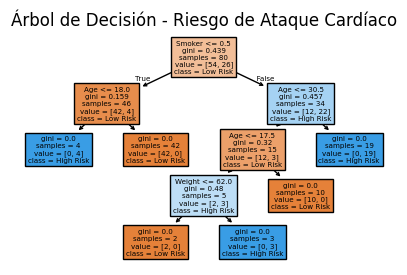

In [ ]:
plt.figure(figsize=(5,3))
tree.plot_tree(modeloDTC, feature_names=['Age', 'Weight', 'Smoker'], class_names=['Low Risk', 'High Risk'], filled=True)
plt.title("Árbol de Decisión - Riesgo de Ataque Cardíaco")
plt.show()

# Actividad 7. Ejemplo de predicción

* Escriba un código para evaluar un dato del modelo

* Use estos comentarios que orienten al usuario



```
print("\nPredicción con un ejemplo nuevo:")
print(f"Predicción (0 = Bajo Riesgo, 1 = Alto Riesgo): {prediction[0]}")

```



In [ ]:
# df['Age'].sort_values()

In [ ]:
# df['Weight'].sort_values()

In [ ]:
example = [[12, 54, 1]] # ejemplo : 32 años, 70 kg, fumadr

prediccion = modeloDTC.predict(example)
if prediccion[0] == 0:
    print("El paciente tiene un riesgo bajo")
else:
    print("El paciente tiene un riesgo alto")



El paciente tiene un riesgo bajo


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Parte 2. Cambiar el tamaño del dataset

* Use el archivo >> DataSet/Classification/Health/heart_attack_risk_dataset.csv

* Ejecute nuevamente y analise los resultados